In [2]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

In [137]:
def train_perceptron(x,y,n_iters=100):
    w= np.zeros( x.shape[1])
    b= 0
    idx= -1
    converged= False
    for i in range(n_iters):
        for j in range( len(x)):
            if y[j]*( np.dot( w, x[j]) + b) <= 0:
                w+= y[j]*x[j]
                b+= y[j]
                idx= j
            elif idx == j:
                converged= True
                break
        if converged:
            print('Algorithm converged in %d iterations'%i)
            break
    return w, b, converged

In [5]:
def colorify( x, y, w, b, evaluator):
    x1min = min(x[:,0]) - 1
    x1max = max(x[:,0]) + 1
    x2min = min(x[:,1]) - 1
    x2max = max(x[:,1]) + 1
    plt.xlim(x1min,x1max)
    plt.ylim(x2min,x2max)
    colors= [ 'ro', 'g^', 'k*', 'b+', 'mx']
    n_class= len( np.unique( y))
    for i in np.unique(y):
        plt.plot(x[(y==i),0], x[(y==i),1], colors[i])
    
    xx1, xx2 = np.meshgrid(np.arange(x1min, x1max, 0.05), 
                           np.arange(x2min, x2max, 0.05))
    grid= np.c_[ np.ravel(xx1), np.ravel( xx2)]
    z= [ evaluator( w, b, pt) for pt in grid]
    plt.pcolormesh( xx1, xx2, np.array(z).reshape( xx1.shape),  vmin= 0, vmax= n_class)

In [159]:
def evaluate( w, b, x):
    if np.dot( w, x) + b > 0:
        return 1
    else:
        return -1
def run_perceptron( file):
    data= np.loadtxt( '../week6/perceptron_at_work/'+file)
    x = data[:,0:2]
    y = data[:,2].astype('int')
    w,b,converged = train_perceptron(x,y,100)
    print( w, b, converged)
    colorify( x, y, w, b, evaluate)

Algorithm converged in 29 iterations
[-8. -5.] 59.0 True
2


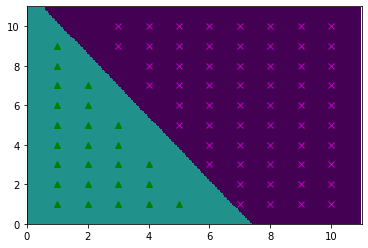

In [152]:
run_perceptron('data_1.txt')

[ 0. -7.] 27.0 False


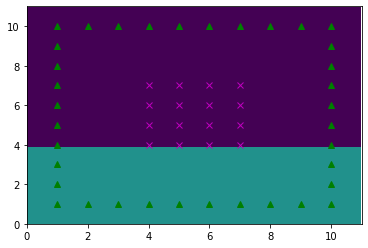

In [154]:
run_perceptron('data_2.txt')

In [ ]:
plt.plot

In [155]:
def evaluate_multi( w, b, x):
    scores= [ np.dot( w_, x) + b_ for w_, b_ in zip ( w, b)]
    return np.argmax( np.array( scores))

def train_perceptron_multi(x,y,n_iters=100):
    w= np.zeros( (len(y), x.shape[1]))
    b= np.zeros( len( np.unique(y)))
    idx= -1
    converged= False
    for i in range(n_iters):
        for j in range( len(x)):
            pred= evaluate_multi( w, b, x[j])
            if pred != y[j]:
                w[j]+= x[j]
                b[y[j]]+= 1
                w[pred]-= x[j]
                b[pred]-= 1
                idx= j
            elif idx == j:
                converged= True
                break
        if converged:
            print('Algorithm converged in %d iterations'%i)
            break
    return w, b, converged

def run_perceptron_multi( file):
    data= np.loadtxt( '../week6/multiclass/'+file)
    x = data[:,0:2]
    y = data[:,2].astype('int8')
    w,b,converged = train_perceptron_multi(x,y,1000)
    colorify( x, y, w, b, evaluate_multi)

Algorithm converged in 41 iterations


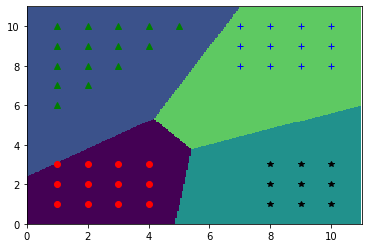

In [156]:
run_perceptron_multi( 'data_3.txt')

Algorithm converged in 229 iterations


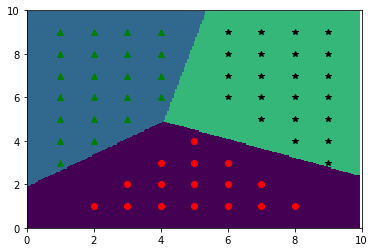

In [157]:
run_perceptron_multi( 'data_4.txt')

In [1]:
import string
from sklearn import svm
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split

In [63]:
with open("../week6/sentiment_svm/full_set.txt") as f:
    content = f.readlines()
content = [x.strip() for x in content]
sentences = [x.split("\t")[0] for x in content]
labels = [x.split("\t")[1] for x in content]
y = np.array(labels, dtype='int8')
y = 2*y - 1

In [64]:
def full_remove(x, removal_list):
    for w in removal_list:
        x = x.replace(w, ' ')
    return x

In [90]:
digits = [str(x) for x in range(10)]
digit_less = [full_remove(x, digits) for x in sentences]
punc_less = [full_remove(x, list(string.punctuation)) for x in digit_less]
sents_lower = [x.lower() for x in punc_less]

vectorizer = CountVectorizer(analyzer = "word", stop_words = 'english', max_features = 400)
data_features = vectorizer.fit_transform(sents_lower).toarray()

trainx, testx, trainy, testy= train_test_split( data_features, y, test_size= 500)

In [91]:
trainx.shape, trainy.shape, testx.shape

((2500, 400), (2500,), (500, 400))

In [92]:
def fit_svm( c_val):
    model= svm.LinearSVC( C= c_val, loss= 'hinge')
    model.fit( trainx, trainy)
    preds_train= model.predict( trainx)
    preds_test= model.predict( testx)
    err_train= np.sum( (preds_train > 0) != ( trainy > 0))/len( trainy)
    err_test= np.sum(( preds_test > 0) != (testy > 0))/len(testy)
    return err_train, err_test

In [93]:
cvals = [0.01,0.1,1.0,10.0,100.0,1000.0,10000.0]
for c in cvals:
    train_error, test_error = fit_svm(c)
    print ("Error rate for C = %0.2f: train %0.3f test %0.3f" % (c, train_error, test_error))

Error rate for C = 0.01: train 0.365 test 0.404
Error rate for C = 0.10: train 0.200 test 0.252
Error rate for C = 1.00: train 0.160 test 0.240
Error rate for C = 10.00: train 0.146 test 0.254
Error rate for C = 100.00: train 0.138 test 0.254
Error rate for C = 1000.00: train 0.254 test 0.320
Error rate for C = 10000.00: train 0.239 test 0.308


/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [130]:
def cross_validation_error(x,y,c_val,k):
    idx= np.random.permutation( len(x))
    size= int(len( x)/k)
    err= 0
    for i in range( k):
        if i != k-1:
            test_idx= idx[ i*size: (i+1)*size]
        else:
            test_idx= idx[ i*size:]
        train_idx= np.setdiff1d( idx, test_idx)
        
        model= svm.LinearSVC( C= c_val, loss= 'hinge')
        model.fit( x[ train_idx], y[ train_idx])
        #print(model.predict( x[ test_idx]).shape)
        err+= float( np.sum( (model.predict(x[ test_idx]) > 0) != (y[ test_idx] > 0)))/len(test_idx)
    return err/k

In [131]:
def c_chooser( x, y, k):
    c= [ 0.01, 0.1, 1, 10, 100, 1000]
    errs= np.zeros( len(c))
    for i in range( len(c)):
        errs[i] = cross_validation_error( x, y, c[i], k)
    fig = plt.figure()
    ax = fig.add_subplot(2, 1, 1)
    ax.plot( c, errs)
    ax.set_xscale('log')
    return c[np.where( errs == min(errs))[0][0]], min(errs)

In [116]:
import warnings
warnings.filterwarnings('ignore')

(10, 0.5058823529411766)

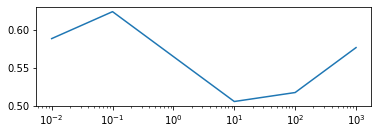

In [133]:
c_chooser( x, y, 5)

In [ ]:
data= np.loadtxt( '../week6/multiclass/'+file)
    x = data[:,0:2]
    y = data[:,2].astype('int8')
    w,b,converged = train_perceptron_multi(x,y,1000)
    colorify( x, y, w, b, evaluate_multi)

In [169]:
def run_multiclass_svm( file,c_val=1.0):
    data = np.loadtxt( '../week6/multiclass/' + file)
    x = data[:,0:2]
    y = data[:,2].astype('int8')
    model = svm.LinearSVC(loss='hinge', multi_class='crammer_singer', 
                        C= c_val)
    model.fit(x,y)
    evaluator= lambda w, b, pt: model.predict(pt.reshape(1,-1))    
    colorify( x, y, None, None, evaluator)

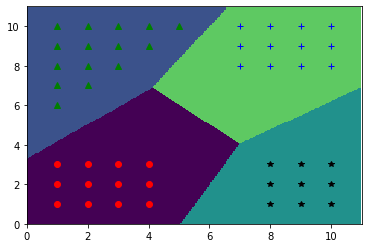

In [170]:
run_multiclass_svm( 'data_3.txt', 10)

In [9]:
def run_kernel_svm( file, c_val=1.0, k='rbf', s_val=1):
    data = np.loadtxt( '../week7/kernel/' + file)
    x = data[:,0:2]
    y = data[:,2].astype('int8')
    
    model= svm.SVC( kernel= k, C= c_val, degree= 2, coef0= 1,
                   gamma= 1.0/(s_val**2))
    model.fit(x,y)
    evaluator= lambda w, b, pt: model.decision_function(pt.reshape(1,-1))    
    colorify( x, y, None, None, evaluator)

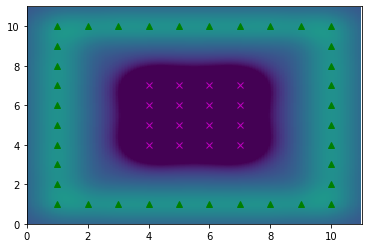

In [10]:
run_kernel_svm( 'data1.txt', 1, 'rbf')

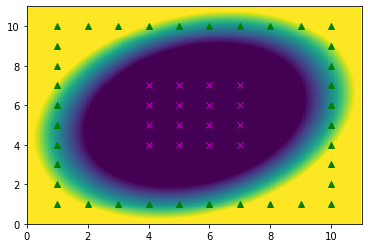

In [12]:
run_kernel_svm( 'data1.txt', 5, 'poly')